# Titulo

- Ana Margarida Ruivo Loureiro - up201705749

- João Martins

- João Ricardo Cardoso

## Abstract

## Introdução

## Dataset

O nosso dataset providencia-nos dados geográficos e contagem de casos confirmados, óbitos e recuperados do Covid-19 num periodo de  4 meses (22 de janeiro de 2020 a 5 de maio de 2020) em vários países. O objetivo será extrair informação dos dados de forma a podermos construir um modelo de regressão capaz de prever as contagens tendo por base os fatores disponiveis (localização geográfica, dia e contagem anterior). Assim sendo é necessário partir dos dados iniciais e proceder a um pré-processamento para tratar os dados e poder-se então utlizar os algoritmos de regressão que pretendemos utilizar.

### Variáveis independentes

Como foi supramencionado, pretendemos utilizar certos fatores para fundamentarmos a nossa previsão (partindo dos dados do dataset). Estes então serão as coordenadas geográficas (Latitude e Longitude), número de dias desde o inicio da previsão (ou seja, 22 de janeiro) e contagens anteriores (número de casos confirmados, óbitos e recuperados do dia anterior).

### Variáveis Dependentes

Os valores que vamos prever serão os números de casos confirmados, óbitos e recuperados, sendo então estas as nossas variáveis independentes.

## Tratamento de dados

Para podermos obter resultados fiáveis, é preciso haver um tratamento dos dados que vem do dataset.
Pegando dos dados processados anteriormente feito inicialmente, começamos por extrai-los do ficheiro para podermos manipulá-los.

In [1]:
import pandas as pd

covid_data = pd.read_csv('covid_19_clean_complete.csv')
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
27451,NaN,Western Sahara,24.215500,-12.885800,5/4/20,6,0,5
27452,NaN,Sao Tome and Principe,0.186360,6.613081,5/4/20,23,3,4
27453,NaN,Yemen,15.552727,48.516388,5/4/20,12,2,0
27454,NaN,Comoros,-11.645500,43.333300,5/4/20,3,0,0


De seguida, após uma análise, verificou-se a presença de entrada respeitantes a navios que nalgum momento tiveram casos de Covid-19 e não estão portanto associados a nenhum país particular.
Além disso, consideramos que estes dados iriam criar ruído, pelo que optamos por ignorá-los e remover dos dados em análise.

In [2]:
covid_data = covid_data.drop(covid_data[covid_data['Province/State']=='Grand Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Province/State']=='Diamond Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Country/Region']=='Diamond Princess'].index)
covid_data = covid_data.drop(covid_data[covid_data['Country/Region']=='MS Zaandam'].index)
covid_data = covid_data.reset_index()
del covid_data['index']
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
27035,NaN,Western Sahara,24.215500,-12.885800,5/4/20,6,0,5
27036,NaN,Sao Tome and Principe,0.186360,6.613081,5/4/20,23,3,4
27037,NaN,Yemen,15.552727,48.516388,5/4/20,12,2,0
27038,NaN,Comoros,-11.645500,43.333300,5/4/20,3,0,0


A maioria das entradas da coluna **Province/State** tem valores nulos, pelo que procedemos a eliminá-los. Além disso, como ter uma entrada para uma região e país não é muito relevante, optamos por agregar as duas informações numa só coluna denominada de **Local**.

In [3]:
import numpy as np

covid_data['Province/State'] = covid_data.replace(np.nan, '', regex=True)
cols = ['Province/State', 'Country/Region']
covid_data['Local'] = covid_data[cols].apply(lambda row: ' / '.join(row.values.astype(str)) if row.values[0] != '' else ''.join(row.values.astype(str)), axis=1)
del covid_data['Province/State']
del covid_data['Country/Region']
covid_data

,Lat,Long,Date,Confirmed,Deaths,Recovered,Local
0,33.000000,65.000000,1/22/20,0,0,0,Afghanistan
1,41.153300,20.168300,1/22/20,0,0,0,Albania
2,28.033900,1.659600,1/22/20,0,0,0,Algeria
3,42.506300,1.521800,1/22/20,0,0,0,Andorra
4,-11.202700,17.873900,1/22/20,0,0,0,Angola
...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,5/4/20,6,0,5,Western Sahara
27036,0.186360,6.613081,5/4/20,23,3,4,Sao Tome and Principe
27037,15.552727,48.516388,5/4/20,12,2,0,Yemen
27038,-11.645500,43.333300,5/4/20,3,0,0,Comoros


De seguida, vamos converter as datas em contagem de dias desde o início do dataset (22 de janeiro de 2020)

In [4]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'],format='%m/%d/%y')
covid_data['Date'] -= pd.to_datetime("2020-01-22")
covid_data['Date'] /= np.timedelta64(1,'D')
covid_data = covid_data.rename(columns  = {'Date':'Days Passed'})
covid_data

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local
0,33.000000,65.000000,0.0,0,0,0,Afghanistan
1,41.153300,20.168300,0.0,0,0,0,Albania
2,28.033900,1.659600,0.0,0,0,0,Algeria
3,42.506300,1.521800,0.0,0,0,0,Andorra
4,-11.202700,17.873900,0.0,0,0,0,Angola
...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,103.0,6,0,5,Western Sahara
27036,0.186360,6.613081,103.0,23,3,4,Sao Tome and Principe
27037,15.552727,48.516388,103.0,12,2,0,Yemen
27038,-11.645500,43.333300,103.0,3,0,0,Comoros


Por fim, adicionar as colunas da contagem do dia anterior. Este passo é um pouco mais longo tendo em conta o numero de linhas e a procura pelo valor anterior.

In [5]:
covid_data['Conf. Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Confirmed'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data['Deaths Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Deaths'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data['Recov. Prev.'] = covid_data.apply(lambda row: 
                                                      covid_data[(covid_data['Local'] == row['Local']) & (covid_data['Days Passed'] == row['Days Passed']-1)]['Recovered'].item()
                                                      if row['Days Passed'] > 0 else 0,axis=1)
covid_data

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local,Conf. Prev.,Deaths Prev.,Recov. Prev.
0,33.000000,65.000000,0.0,0,0,0,Afghanistan,0,0,0
1,41.153300,20.168300,0.0,0,0,0,Albania,0,0,0
2,28.033900,1.659600,0.0,0,0,0,Algeria,0,0,0
3,42.506300,1.521800,0.0,0,0,0,Andorra,0,0,0
4,-11.202700,17.873900,0.0,0,0,0,Angola,0,0,0
...,...,...,...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,103.0,6,0,5,Western Sahara,6,0,5
27036,0.186360,6.613081,103.0,23,3,4,Sao Tome and Principe,16,1,4
27037,15.552727,48.516388,103.0,12,2,0,Yemen,10,2,0
27038,-11.645500,43.333300,103.0,3,0,0,Comoros,3,0,0


In [6]:
with pd.ExcelWriter('covid_19_distance.xlsx') as writer:
    covid_data.to_excel(writer)

## K Nearest Neighbours
Este dataset que processamos permite-nos agrupar certos fatores relevantes como a posição geográfica e contagem dos dias anteriores para  poder-se relacionar certos pontos (entradas de dados) e obter uma previsão dos dados tendo em conta aquelas que estão mais próximas, que é em que se baseia o algoritmo **K Nearest neighbours**.
Já que pretendemos construir um modelo de regressão destes dados, vamos recorrer à ferramenta *scikit-learn* para utilizar os seus algoritmos de regressão, nos quais se encontra o **KNeighborsRegressor**, que será o escolhido para aplicar o KNN.

### KNeighborsRegressor
#### Parâmetros da pesquisa
* **n_neighbors**: número de vizinhos para usar, por defeito, 5.
* **weights**: função de peso utilizado na previsão. Valores a testar:
    * *uniform*: pesos uniformes, todos os pontos na vizinhança são pesados igualmente
    * *distance*: pesos influenciados pela distância ao ponto de pesquisa, em que pontos vizinhos mais pertos do ponto de pesquisa terão mais influência do que aqueles mais afastados
* **algorithm**: algoritmo usado para computar os nearest neighbors. Opção a usar:
    * *auto*: tenta decidir qual a melhor escolha, tendo em conta os valores passados para a função de **fit()** dentro das possíveis escolhas, *ball_tree*, *kd_tree* ou *brute*
* **n_jobs**: definir nº de processos para paralelizar os trabalhos
    * *None*: não há paralelismo (usar em debug)
    * *-1*: todos os cpu's são usados
    
#### Criação dos sets de treino e teste
Procedemos então à criação de sets para podermos treinar o nosso modelo, e por fim testá-lo.

In [7]:
from sklearn.model_selection import train_test_split


#criar set de treino e teste
train, test = train_test_split(covid_data, test_size=0.0096)
train

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local,Conf. Prev.,Deaths Prev.,Recov. Prev.
16509,21.000000,78.000000,63.0,657,12,43,India,536,10,40
11991,12.238300,-1.561600,46.0,0,0,0,Burkina Faso,0,0,0
9877,15.552727,48.516388,37.0,0,0,0,Yemen,0,0,0
12427,15.000000,101.000000,47.0,50,1,31,Thailand,50,1,31
6218,11.803700,-15.180400,23.0,0,0,0,Guinea-Bissau,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13613,11.825100,42.590300,52.0,0,0,0,Djibouti,0,0,0
21543,37.090200,-95.712900,82.0,580619,27870,43482,US,555313,26086,32988
18981,41.153300,20.168300,73.0,333,20,99,Albania,304,17,89
2175,-1.831200,-78.183400,8.0,0,0,0,Ecuador,0,0,0


In [8]:
test

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local,Conf. Prev.,Deaths Prev.,Recov. Prev.
12618,31.2400,36.5100,48.0,1,0,0,Jordan,1,0,0
23129,-3.3731,29.9189,88.0,5,1,0,Burundi,5,1,0
16663,50.8333,4.0000,64.0,6235,220,675,Belgium,4937,178,547
23084,46.8182,8.2275,88.0,27740,1393,17800,Switzerland,27404,1368,17100
12943,63.0000,16.0000,49.0,500,1,1,Sweden,355,0,1
...,...,...,...,...,...,...,...,...,...,...
15171,71.7069,-42.6043,58.0,2,0,0,Greenland / Denmark,2,0,0
24236,19.1959,109.7453,93.0,168,6,162,Hainan / China,168,6,162
4138,11.8037,-15.1804,15.0,0,0,0,Guinea-Bissau,0,0,0
3195,30.6171,102.7103,12.0,254,1,14,Sichuan / China,231,1,11


In [14]:
#colunas em que vamos basear as previsões
x_columns = ['Lat','Long','Days Passed', 'Conf. Prev.','Deaths Prev.','Recov. Prev.']
#colunas que queremos prever
y_columns = ['Confirmed','Deaths','Recovered']

from sklearn.neighbors import KNeighborsRegressor
#criar o modelo e usar o número de vizinhos default, 5.
knn = KNeighborsRegressor(n_neighbors=5)
#aplicar a função de fit ao set de treino
knn.fit(train[x_columns],train[y_columns])
#fazer previsões do set de teste usando 
predictions = knn.predict(test[x_columns])

#tratar dos resultados
predictions = pd.DataFrame(data=predictions,columns=['Confirmed Prediction','Deaths Prediction','Recovered Prediction'])
predictions['Local'] = test['Local'].tolist()
#arredondar os valores para inteiros, com teto
predictions['Confirmed Prediction'] = predictions['Confirmed Prediction'].apply(np.ceil)
predictions['Deaths Prediction'] = predictions['Deaths Prediction'].apply(np.ceil)
predictions['Recovered Prediction'] = predictions['Recovered Prediction'].apply(np.ceil)
predictions['Confirmed Actual'] = test['Confirmed'].tolist()
predictions['Deaths Actual'] = test['Deaths'].tolist()
predictions['Recovered Actual'] = test['Recovered'].tolist()
predictions['Days Passed'] = test['Days Passed'].tolist()
predictions = predictions[['Days Passed','Local', 'Confirmed Prediction', 'Confirmed Actual','Deaths Prediction', 'Deaths Actual','Recovered Prediction','Recovered Actual']]
predictions

,Days Passed,Local,Confirmed Prediction,Confirmed Actual,Deaths Prediction,Deaths Actual,Recovered Prediction,Recovered Actual
0,0.0,Kenya,0.0,0,0.0,0,0.0,0
1,56.0,Curacao / Netherlands,4.0,3,1.0,0,0.0,0
2,64.0,Laos,4.0,6,0.0,0,0.0,0
3,89.0,Cambodia,122.0,122,0.0,0,111.0,107
4,84.0,Shanghai / China,628.0,622,7.0,7,0.0,0
...,...,...,...,...,...,...,...,...
255,97.0,Benin,70.0,64,2.0,1,35.0,33
256,37.0,Timor-Leste,0.0,0,0.0,0,0.0,0
257,95.0,Liberia,133.0,124,12.0,12,30.0,25
258,77.0,Czechia,5323.0,5312,107.0,99,43.0,0


In [10]:
covid_data['Date']

KeyError: 'Date'

## SVR

In [7]:
from sklearn.svm import SVR

In [8]:
covid_data

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local,Conf. Prev.,Deaths Prev.,Recov. Prev.
0,33.000000,65.000000,0.0,0,0,0,Afghanistan,0,0,0
1,41.153300,20.168300,0.0,0,0,0,Albania,0,0,0
2,28.033900,1.659600,0.0,0,0,0,Algeria,0,0,0
3,42.506300,1.521800,0.0,0,0,0,Andorra,0,0,0
4,-11.202700,17.873900,0.0,0,0,0,Angola,0,0,0
...,...,...,...,...,...,...,...,...,...,...
27035,24.215500,-12.885800,103.0,6,0,5,Western Sahara,6,0,5
27036,0.186360,6.613081,103.0,23,3,4,Sao Tome and Principe,16,1,4
27037,15.552727,48.516388,103.0,12,2,0,Yemen,10,2,0
27038,-11.645500,43.333300,103.0,3,0,0,Comoros,3,0,0


Extrair variáveis dependentes e independentes do dataset

In [9]:
from sklearn.model_selection import train_test_split


#criar set de treino e teste
train, test = train_test_split(covid_data, test_size=0.0096)
train

,Lat,Long,Days Passed,Confirmed,Deaths,Recovered,Local,Conf. Prev.,Deaths Prev.,Recov. Prev.
23307,52.1326,5.2913,89.0,33405,3751,250,Netherlands,32655,3684,250
24548,-12.8275,45.1662,94.0,380,4,144,Mayotte / France,354,4,144
25415,48.6690,19.6990,97.0,1384,20,423,Slovakia,1381,18,403
14663,-17.7134,178.0650,56.0,0,0,0,Fiji,0,0,0
4914,13.1939,-59.5432,18.0,0,0,0,Belize,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14382,-4.0383,21.7587,55.0,1,0,0,Congo (Brazzaville),1,0,0
15563,37.0902,-95.7129,59.0,25600,442,176,US,19273,349,147
2103,50.8333,4.0000,8.0,0,0,0,Belgium,0,0,0
14767,15.0000,101.0000,56.0,212,1,42,Thailand,177,1,41


In [10]:
#colunas em que vamos basear as previsões
x_columns = ['Lat','Long','Days Passed', 'Conf. Prev.','Deaths Prev.','Recov. Prev.']
#colunas que queremos prever
y_columns = ['Confirmed','Deaths','Recovered']

Escalar os valores existentes de forma a que não sejam discrepantes uns dos outros

In [11]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(train[x_columns])
Y = scaler_y.fit_transform(train[y_columns])
X_test = scaler_X.fit_transform(test[x_columns])

In [12]:
X= X.reshape(-1, 1)
Y= Y.reshape(-1, 1)
X_test= X_test.reshape(-1, 1)

In [13]:
regressor = SVR(kernel='rbf')


In [14]:
train_size = 26780

In [21]:
regressor.fit(X[:train_size],Y[:train_size].ravel())

SVR()

In [22]:
predictions = regressor.predict(X_test[:train_size])

In [23]:
predictions

array([-0.02454005, -0.02553643, -0.02506158, ..., -0.02452887,
       -0.02455866, -0.02457085])

In [24]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

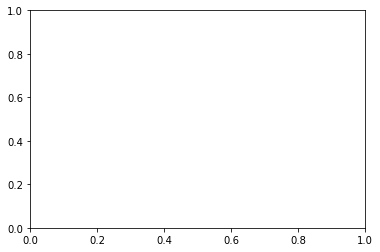

In [25]:
import pylab as pl
pl.scatter(X, Y, c='k', label='data')
pl.hold('on')
pl.plot(X, predictions, c='g', label='RBF model')
pl.xlabel('data')
pl.ylabel('target')
pl.title('Support Vector Regression')
pl.legend()
pl.show()